In [ ]:
import numpy as np      # Librería para cálculos numéricos
import pandas as pd     # Librería para manejar DataFrames
import scipy.optimize as op   # Librería para métodos de optimización
import sf_library as sfl      # Nuestra libreria

# Lista de tickers de sectores (ETF de SPDR)
tickers = [
    'XLK',  # Tecnología
    'XLF',  # Finanzas
    'XLV',  # Salud
    'XLP',  # Consumo básico
    'XLY',  # Consumo discrecional
    'XLE',  # Energía
    'XLI',  # Industrial
    'XLC',  # Comunicaciones
    'XLB',  # Materiales
    'XLU',  # Servicios públicos
    'XLRE', # Bienes raíces
]

# Lista donde guardaremos todas las series de retornos
all_returns = []

# Recorrer cada ticker
for ticker in tickers:
    t = sfl.daily_return(ticker, data_dir="MarketData")  # Carga los retornos diarios desde nuestra librería
    t = t[['date', 'return']].rename(columns={'return': ticker})  # Deja solo fecha y retorno, renombrando la columna
    all_returns.append(t)  # Guarda la serie en la lista


# Comenzamos la sincronización usando el primer DataFrame
df = all_returns[0]

# Unimos cada serie con las demás usando la fecha como llave
for t in all_returns[1:]:
    df = pd.merge(df, t, on='date', how='inner')  # Unión interna: solo fechas que existan en todos

# Limpiamos datos y ordenamos por fecha
df = df.dropna().sort_values('date').reset_index(drop=True)
# df = df[(df['date']<'2021-01-01')&(df['date']>'2019-01-01')]

# Filtro actual: solo fechas antes de 2019
df = df[df['date']<'2019-01-01']


/Users/jonathanpena/anaconda3/envs/workShop/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,date,XLK,XLF,XLV,XLP,XLY,XLE,XLI,XLC,XLB,XLU,XLRE
0,2018-06-20,0.002100,-0.002560,0.002121,0.000979,0.004741,0.004416,0.000683,0.012410,-0.003248,0.000797,0.010794
1,2018-06-21,-0.007684,-0.002933,-0.005762,0.001956,-0.007123,-0.018516,-0.012555,-0.006129,-0.010635,0.003385,0.005967
2,2018-06-22,-0.003238,-0.004779,0.004495,0.008202,-0.001704,0.019951,0.003455,0.004376,0.014563,0.006944,0.008742
3,2018-06-25,-0.020762,-0.010713,-0.009184,0.005036,-0.021739,-0.020093,-0.012670,-0.020598,-0.015550,0.016552,-0.002476
4,2018-06-26,0.004038,-0.003361,-0.003090,-0.004240,0.007163,0.012629,0.003766,0.001658,0.003819,0.001163,0.005275
...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-12-24,-0.026689,-0.021062,-0.023948,-0.028896,-0.018985,-0.040457,-0.030683,-0.021100,-0.025926,-0.041814,-0.036834
130,2018-12-26,0.060396,0.045271,0.043618,0.027909,0.059252,0.062222,0.046569,0.056197,0.044783,0.013576,0.031869
131,2018-12-27,0.007201,0.012007,0.011043,0.009583,0.005337,0.005246,0.012510,0.004616,0.018399,0.008419,0.002276
132,2018-12-28,-0.002275,-0.000424,0.001174,0.000000,0.000102,-0.007653,-0.002659,-0.003144,-0.005361,0.002467,0.003568


In [2]:
mtx = df.drop(columns='date')          # Quita la columna 'date' para quedarse solo con los retornos numéricos
mtx_var_covar = mtx.cov().values * 252 # Calcula la matriz de varianza-covarianza y la anualiza multiplicando por 252
mtx_correl = mtx.corr().values         # Calcula la matriz de correlaciones entre todos los activos
mtx_var_covar                           # Muestra la matriz de varianza-covarianza

array([[0.06301887, 0.03273995, 0.03568624, 0.01458515, 0.04734996,
        0.03534278, 0.0381042 , 0.05049628, 0.03373095, 0.0027751 ,
        0.01631589],
       [0.03273995, 0.03465556, 0.0226604 , 0.01284432, 0.02870759,
        0.02705053, 0.02779768, 0.02714779, 0.02452539, 0.00254935,
        0.01185534],
       [0.03568624, 0.0226604 , 0.02988676, 0.01529727, 0.02911547,
        0.02665559, 0.02689771, 0.02899489, 0.02350666, 0.00707624,
        0.01513521],
       [0.01458515, 0.01284432, 0.01529727, 0.019409  , 0.0143254 ,
        0.01400942, 0.01535668, 0.01213559, 0.01366681, 0.0136551 ,
        0.01739897],
       [0.04734996, 0.02870759, 0.02911547, 0.0143254 , 0.04365229,
        0.03104747, 0.03348123, 0.04042587, 0.02973033, 0.0027984 ,
        0.01681816],
       [0.03534278, 0.02705053, 0.02665559, 0.01400942, 0.03104747,
        0.05254517, 0.03159777, 0.03025855, 0.03046285, 0.00431767,
        0.01245355],
       [0.0381042 , 0.02779768, 0.02689771, 0.01535668, 0.

In [3]:
# ======================================
# Mínima varianza con descomposición de autovalores
# ======================================

eigenvalues, eigenvectors = np.linalg.eigh(mtx_var_covar)  
# Calcula autovalores y autovectores de la matriz var-covar (simétrica → usar eigh)
min_var_vector = eigenvectors[:, 0]  
# Toma el autovector asociado al autovalor más pequeño (columna 0)
# Este vector es la combinación lineal de mínima varianza

# # Prueba unitaria de la función de varianza
# variance_1 = np.matmul(
#     np.transpose(min_var_vector),           # Transpone el vector
#     np.matmul(mtx_var_covar, min_var_vector) # Multiplica para obtener la varianza resultante
# )

In [4]:
eigenvalues

array([0.00308341, 0.00387748, 0.00421091, 0.00573578, 0.00616795,
       0.0084941 , 0.01071948, 0.01491383, 0.02870003, 0.04763905,
       0.28375378])

In [5]:
eigenvectors

array([[ 0.55858142, -0.20288958,  0.15589422,  0.26059762, -0.20049592,
         0.32670779,  0.07567093,  0.1751755 ,  0.36260137,  0.22619045,
         0.43430113],
       [-0.04692949, -0.04678713,  0.10247678, -0.05144372, -0.25853902,
        -0.16845423,  0.64528957, -0.60243605, -0.15782471,  0.03028168,
         0.28650993],
       [-0.37654733,  0.00770697,  0.43098448, -0.28495901,  0.45638668,
         0.5199494 ,  0.12925214,  0.04637   ,  0.0430369 , -0.0850826 ,
         0.29089476],
       [ 0.38785857, -0.20263008, -0.5598202 , -0.44611406,  0.26055882,
         0.10967334,  0.06220095, -0.09369628,  0.0015306 , -0.42235234,
         0.15855422],
       [-0.44808284, -0.3336828 , -0.41941968,  0.45140195,  0.29783749,
        -0.18511736, -0.01728787, -0.01596671,  0.19855328,  0.10288636,
         0.36696397],
       [ 0.06325561, -0.01093464, -0.015212  ,  0.06159019,  0.00243822,
        -0.12221198,  0.15733675,  0.54354277, -0.73713021,  0.01440997,
         0.336

In [6]:
sum(min_var_vector**2)

0.9999999999999994

In [7]:
mtx = df.drop(columns='date')                 # Elimina la columna 'date' para trabajar solo con retornos numéricos

mtx_var_covar = mtx.cov().values * 252        # Calcula la matriz varianza-covarianza y la anualiza (multiplica por 252 días)

mtx_correl = mtx.corr().values                # Calcula la matriz de correlaciones entre los activos



# ======================================
# Mínima varianza con descomposición de autovalores
# ======================================

eigenvalues, eigenvectors = np.linalg.eigh(mtx_var_covar)  # Calcula autovalores y autovectores de la matriz
min_var_vector = eigenvectors[:, 0]                        # Autovector asociado al autovalor más pequeño (mínima varianza)



# Prueba unitaria de la función de varianza
variance_1 = np.matmul(
    np.transpose(min_var_vector),                          # Transpone el vector de pesos
    np.matmul(mtx_var_covar, min_var_vector)               # Multiplica mtx * vector para obtener la varianza
)



# ======================================
# Mínima varianza con scipy.optimize.minimize
# ======================================

# Función objetivo: varianza del portafolio
def portfolio_variance(x, mtx_var_covar):
    variance = np.matmul(np.transpose(x), np.matmul(mtx_var_covar, x))  # Fórmula de varianza de portafolio
    return variance

# Vector inicial para el optimizador (distribución uniforme normalizada)
x0 = [1 / np.sqrt(len(tickers))] * len(tickers)  # Cada peso inicial es 1/√n



# Restricciones de norma L2 y L1 (elige una)
l2_norm = [{"type": "eq", "fun": lambda x: sum(x ** 2) - 1}]  # Los pesos deben tener norma L2 = 1
l1_norm = [{"type": "eq", "fun": lambda x: sum(abs(x)) - 1}]  # Los pesos deben sumar en valor absoluto = 1



# Optimización
optimal_result = op.minimize(
    fun=portfolio_variance,        # Función a minimizar
    x0=x0,                         # Punto inicial
    args=(mtx_var_covar,),         # Argumentos adicionales
    constraints=l2_norm            # Restricción elegida (aquí L2)
)

optimize_vector = optimal_result.x  # Extrae el vector de pesos óptimos
variance_2 = optimal_result.fun     # Varianza mínima resultante



# ======================================
# Construcción del DataFrame de resultados
# ======================================

df_weights = pd.DataFrame()                   # Crea un DataFrame vacío
df_weights['rics'] = tickers                 # Agrega columna con tickers
df_weights['min_var_vector'] = min_var_vector  # Pesos obtenidos por autovalores
df_weights['optimize_vector'] = optimize_vector # Pesos obtenidos por optimización

print(df_weights)                             # Muestra el DataFrame final


    rics  min_var_vector  optimize_vector
0    XLK        0.558581        -0.556876
1    XLF       -0.046929         0.047365
2    XLV       -0.376547         0.377162
3    XLP        0.387859        -0.386538
4    XLY       -0.448083         0.450263
5    XLE        0.063256        -0.063210
6    XLI        0.124112        -0.130268
7    XLC       -0.190483         0.187671
8    XLB       -0.068527         0.072008
9    XLU       -0.317458         0.316645
10  XLRE        0.177818        -0.177799


In [8]:
sum(min_var_vector ** 2)


0.9999999999999994

In [9]:
((df_weights['optimize_vector']**2).sum())

1.0000008477565532

In [10]:
(df_weights['min_var_vector']**2).sum()

0.9999999999999994

¿Portafolios de Minima varianza?

In [11]:
# =====================================================================
# Lista de activos a incluir en el portafolio
# =====================================================================
tickers = [
    'XLK','XLF','XLV','XLP','XLY','XLE','XLI','XLC','XLB','XLU','XLRE'
]

# =====================================================================
# Cargar retornos diarios de cada activo y unirlos en un solo DataFrame
# =====================================================================
all_returns = []   # Lista donde se guardará un DataFrame por activo

for ticker in tickers:
    t = sfl.daily_return(ticker, data_dir="MarketData")      # Cargar retornos
    t = t[['date', 'return']].rename(columns={'return': ticker})  # Renombramos la columna return por el ticker
    all_returns.append(t)   # Lo guardamos en la lista

# Unimos todos los activos por la columna "date"
df = all_returns[0]
for t in all_returns[1:]:
    df = pd.merge(df, t, on='date', how='inner')   # Solo fechas compartidas

# Limpiamos y ordenamos
df = df.dropna().sort_values('date').reset_index(drop=True)

# Filtramos datos anteriores a 2019 (ventana histórica)
df = df[df['date']<'2019-01-01']

# =====================================================================
# Construcción de matriz de retornos y parámetros de Markowitz
# =====================================================================
mtx = df.drop(columns='date')    # Matriz solo de retornos
returns = mtx

# Retorno promedio anual de cada activo
mean_returns = returns.mean() * 252   # Multiplicado por días de mercado

# Matriz de covarianza anualizada
cov_matrix = returns.cov() * 252

n = len(tickers)   # Número de activos

# =====================================================================
# Función rendimiento y riesgo del portafolio
# =====================================================================
def portfolio_performance(weights):
    """
    Calcula retorno y volatilidad del portafolio.
    Fórmulas:
        rp = w^T μ
        σp = sqrt(w^T Σ w)
    """
    ret = np.dot(weights, mean_returns)                # w^T μ
    vol = np.sqrt(weights @ cov_matrix @ weights.T)    # sqrt(w^T Σ w)
    return ret, vol

# =====================================================================
# OPTIMIZACIÓN 1: Portafolio de mínima volatilidad
# =====================================================================
def minimize_volatility():
    x0 = np.ones(n)/n      # Condición inicial: pesos iguales
    bounds = tuple((0,1) for _ in range(n))  # Pesos entre 0 y 1 (no short)
    constraints = ({'type':'eq','fun':lambda w: np.sum(w)-1})  # Suma de pesos = 1

    # Minimizamos solo la volatilidad:
    # minimize( σp(w) )
    result = op.minimize(
        lambda w: portfolio_performance(w)[1],
        x0, constraints=constraints, bounds=bounds
    )
    return result.x, portfolio_performance(result.x)

# =====================================================================
# OPTIMIZACIÓN 2: Portafolio de máximo retorno
# =====================================================================
def maximize_return():
    x0 = np.ones(n)/n
    bounds = tuple((0,1) for _ in range(n))
    constraints = ({'type':'eq','fun':lambda w: np.sum(w)-1})

    # maximize(rp)  equivale a minimize(-rp)
    result = op.minimize(
        lambda w: -portfolio_performance(w)[0],
        x0, constraints=constraints, bounds=bounds
    )
    return result.x, portfolio_performance(result.x)

# =====================================================================
# OPTIMIZACIÓN 3: Portafolio de máximo Sharpe ratio
# =====================================================================
def maximize_sharpe(risk_free=0.0):
    """
    Sharpe ratio:
        S = (rp - rf) / σp
    maximize(S)  <--> minimize( -S )
    """
    x0 = np.ones(n)/n
    bounds = tuple((0,1) for _ in range(n))
    constraints = ({'type':'eq','fun':lambda w: np.sum(w)-1})

    def neg_sharpe(w):
        r, vol = portfolio_performance(w)
        return -(r - risk_free) / vol    # Negativo porque minimize() debe maximizar el Sharpe

    result = op.minimize(
        neg_sharpe, x0, constraints=constraints, bounds=bounds
    )
    return result.x, portfolio_performance(result.x)
# =====================================================================
# MODELO CLASICO 
# =====================================================================

def min_variance_given_return(target_return):

    # Punto inicial: pesos iguales
    x0 = np.ones(n) / n

    # Restricciones: suma de pesos = 1  y retorno objetivo
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},                     # suma = 1
        {'type': 'eq', 'fun': lambda w: np.dot(w, mean_returns) - target_return}  # retorno deseado
    )

    # No permitir posiciones cortas (0 a 1)
    bounds = tuple((0, 1) for _ in range(n))

    # Función objetivo: varianza
    def variance(w):
        return w @ cov_matrix @ w.T

    # Optimización
    result = op.minimize(
        variance,
        x0,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    # Retornar pesos + rendimiento y riesgo resultante
    w = result.x
    ret, vol = portfolio_performance(w)

    return w, ret, vol


# =====================================================================
# EJECUCIÓN DE LOS MODELOS
# =====================================================================

# Portafolio de mínima varianza
w_min, (ret_min, vol_min) = minimize_volatility()

# Portafolio de máximo retorno
w_ret, (ret_mx, vol_mx) = maximize_return()

# Portafolio de máximo Sharpe
w_sharpe, (ret_s, vol_s) = maximize_sharpe()

target = 0.30   # 12% retorno objetivo
w_opt, r_opt, vol_opt = min_variance_given_return(target)


# =====================================================================
# RESULTADOS
# =====================================================================

def print_portfolio(name, weights, ret, vol):
    print(f"\n=== {name} ===")
    print("Ticker  |   Peso asignado")
    print("--------------------------")
    for t, w in zip(tickers, weights):
        print(f"{t:<6} | {w:.4f}")   # formatea pesos a 4 decimales
    print("Retorno esperado anual:", ret)
    print("Volatilidad anual:", vol)


# Imprimir resultados con tickers
print_portfolio("Portafolio Mínima Varianza", w_min, ret_min, vol_min)
print_portfolio("Portafolio Máximo Retorno", w_ret, ret_mx, vol_mx)
print_portfolio("Portafolio Máximo Sharpe", w_sharpe, ret_s, vol_s)
print_portfolio("Portafolio Máximo Sharpe_12%", w_opt, r_opt, vol_opt)




=== Portafolio Mínima Varianza ===
Ticker  |   Peso asignado
--------------------------
XLK    | 0.0000
XLF    | 0.1865
XLV    | 0.0000
XLP    | 0.1571
XLY    | 0.0000
XLE    | 0.0000
XLI    | 0.0000
XLC    | 0.0948
XLB    | 0.0787
XLU    | 0.4829
XLRE   | 0.0000
Retorno esperado anual: -0.01649603004073142
Volatilidad anual: 0.11939385630145868

=== Portafolio Máximo Retorno ===
Ticker  |   Peso asignado
--------------------------
XLK    | 0.0000
XLF    | 0.0000
XLV    | 0.0000
XLP    | 0.0000
XLY    | 0.0000
XLE    | 0.0000
XLI    | 0.0000
XLC    | 0.0000
XLB    | 0.0000
XLU    | 1.0000
XLRE   | 0.0000
Retorno esperado anual: 0.144068996388647
Volatilidad anual: 0.15295808563088412

=== Portafolio Máximo Sharpe ===
Ticker  |   Peso asignado
--------------------------
XLK    | 0.0000
XLF    | 0.0000
XLV    | 0.1245
XLP    | 0.0000
XLY    | 0.0000
XLE    | 0.0000
XLI    | 0.0000
XLC    | 0.0000
XLB    | 0.0000
XLU    | 0.8755
XLRE   | 0.0000
Retorno esperado anual: 0.1344571424365295


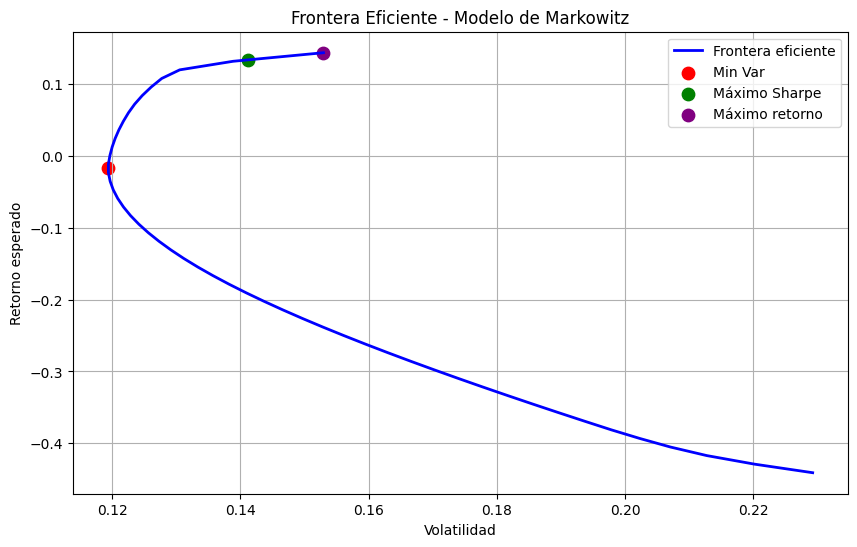

In [12]:
import numpy as np
import pandas as pd
import scipy.optimize as op
import matplotlib.pyplot as plt
import sf_library as sfl

# ==============================
# 1. Cargar retornos
# ==============================
tickers = [
    'XLK','XLF','XLV','XLP','XLY','XLE','XLI','XLC','XLB','XLU','XLRE'
]

all_returns = []
for ticker in tickers:
    t = sfl.daily_return(ticker, data_dir="MarketData")
    t = t[['date', 'return']].rename(columns={'return': ticker})
    all_returns.append(t)

df = all_returns[0]
for t in all_returns[1:]:
    df = pd.merge(df, t, on='date', how='inner')

df = df.dropna().sort_values('date').reset_index(drop=True)
df = df[df['date']<'2019-01-01']

returns = df.drop(columns='date')
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252
n = len(tickers)

# ==============================
# 2. Funciones base
# ==============================
def performance(weights):
    """ Retorno y volatilidad del portafolio """
    ret = np.dot(weights, mean_returns)
    vol = np.sqrt(weights @ cov_matrix @ weights.T)
    return ret, vol

def constraint_sum_weights():
    return {'type':'eq', 'fun':lambda w: np.sum(w) - 1}

bounds = tuple((0,1) for _ in range(n))   # NO short selling
x0 = np.ones(n) / n                        # Pesos iniciales iguales

# ==============================
# 3. Portafolio mínima varianza
# ==============================
def minimize_volatility():
    result = op.minimize(
        lambda w: performance(w)[1],
        x0,
        method='SLSQP',
        constraints=constraint_sum_weights(),
        bounds=bounds
    )
    return result.x, performance(result.x)

# ==============================
# 4. Portafolio máximo retorno
# ==============================
def maximize_return():
    result = op.minimize(
        lambda w: -performance(w)[0],
        x0,
        method='SLSQP',
        constraints=constraint_sum_weights(),
        bounds=bounds
    )
    return result.x, performance(result.x)

# ==============================
# 5. Portafolio máximo Sharpe
# ==============================
def maximize_sharpe(rf=0.0):
    def neg_sharpe(w):
        ret, vol = performance(w)
        return -(ret - rf) / vol

    result = op.minimize(
        neg_sharpe,
        x0,
        method='SLSQP',
        constraints=constraint_sum_weights(),
        bounds=bounds
    )
    return result.x, performance(result.x)

# ==============================
# 6. Frontera eficiente
# ==============================
def efficient_frontier(n_points=50):
    target_returns = np.linspace(mean_returns.min(), mean_returns.max(), n_points)
    frontier_vols = []
    frontier_rets = []

    for tr in target_returns:
        constraints = [
            constraint_sum_weights(),
            {'type': 'eq', 'fun': lambda w, tr=tr: np.dot(w, mean_returns) - tr}
        ]
        result = op.minimize(
            lambda w: performance(w)[1],
            x0,
            method='SLSQP',
            constraints=constraints,
            bounds=bounds
        )
        if result.success:
            vol = performance(result.x)[1]
            frontier_vols.append(vol)
            frontier_rets.append(tr)
    
    return np.array(frontier_vols), np.array(frontier_rets)

# ==============================
# 7. Ejecutar optimizaciones
# ==============================
w_min, (ret_min, vol_min) = minimize_volatility()
w_ret, (ret_mx, vol_mx) = maximize_return()
w_sharpe, (ret_s, vol_s) = maximize_sharpe()

# ==============================
# 8. Frontera eficiente
# ==============================
front_vols, front_rets = efficient_frontier()

# ==============================
# 9. Gráfico profesional
# ==============================
plt.figure(figsize=(10,6))

# Frontera eficiente
plt.plot(front_vols, front_rets, color='blue', linewidth=2, label="Frontera eficiente")

# Portafolio mínimo riesgo
plt.scatter(vol_min, ret_min, color='red', s=80, label="Min Var")

# Portafolio máximo Sharpe
plt.scatter(vol_s, ret_s, color='green', s=80, label="Máximo Sharpe")

# Portafolio máximo retorno
plt.scatter(vol_mx, ret_mx, color='purple', s=80, label="Máximo retorno")

plt.title("Frontera Eficiente - Modelo de Markowitz")
plt.xlabel("Volatilidad")
plt.ylabel("Retorno esperado")
plt.legend()
plt.grid(True)
plt.show()
